# scplotter to work with Akoya CODEX data prepared by Seurat

See: <https://satijalab.org/seurat/articles/seurat5_spatial_vignette_2#human-lymph-node-akoya-codex-system>

Go back to scplotter documentation: <https://pwwang.github.io/scplotter/>

In [1]:
options(future.globals.maxSize = 512 * 1024^3) # 512 GB
suppressPackageStartupMessages({
    library(Seurat)
})
# Load the scplotter package
# library(scplotter)
devtools::load_all()
# devtools::load_all("../../../plotthis")

codex.obj <- LoadAkoya(filename = "data/Akoya_CODEX/LN7910_20_008_11022020_reg001_compensated.csv",
    type = "processor", fov = "HBM754.WKLP.262")
codex.obj <- NormalizeData(object = codex.obj, normalization.method = "CLR", margin = 2)
codex.obj <- ScaleData(codex.obj)
VariableFeatures(codex.obj) <- rownames(codex.obj)  # since the panel is small, treat all features as variable.
codex.obj <- RunPCA(object = codex.obj, npcs = 20, verbose = FALSE)
codex.obj <- RunUMAP(object = codex.obj, dims = 1:20, verbose = FALSE)
codex.obj <- FindNeighbors(object = codex.obj, dims = 1:20, verbose = FALSE)
codex.obj <- FindClusters(object = codex.obj, verbose = FALSE, resolution = 0.4, n.start = 1)
codex.obj

ℹ Loading scplotter
Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”
Normalizing layer: counts

Normalizing across cells

Centering and scaling data matrix

Warning message in svd.function(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


An object of class Seurat 
28 features across 188450 samples within 1 assay 
Active assay: Akoya (28 features, 28 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap
 1 spatial field of view present: HBM754.WKLP.262

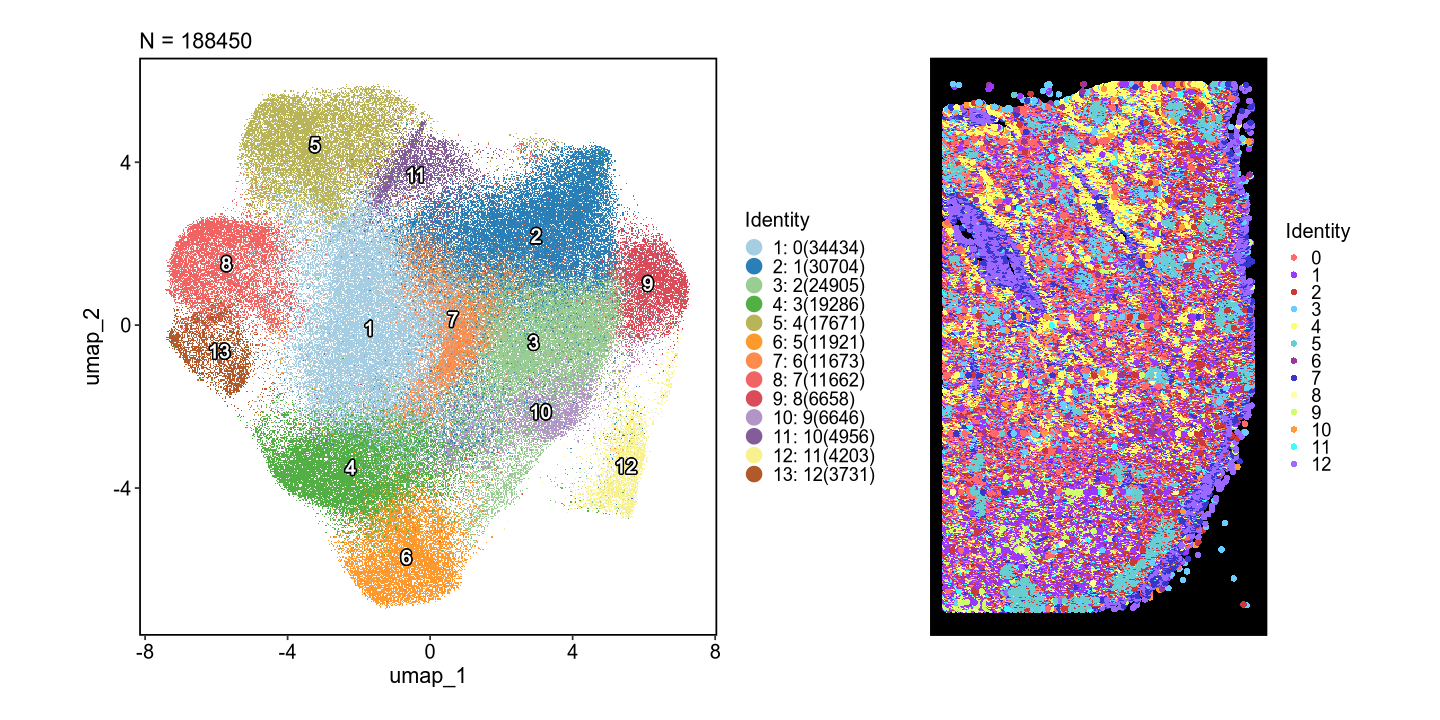

In [10]:
options(repr.plot.width = 12, repr.plot.height = 6)

p1 <- CellDimPlot(codex.obj, label = TRUE)
p2 <- SpatDimPlot(codex.obj, image = "black", palette = "parade", padding = 0.05)

p1 + p2

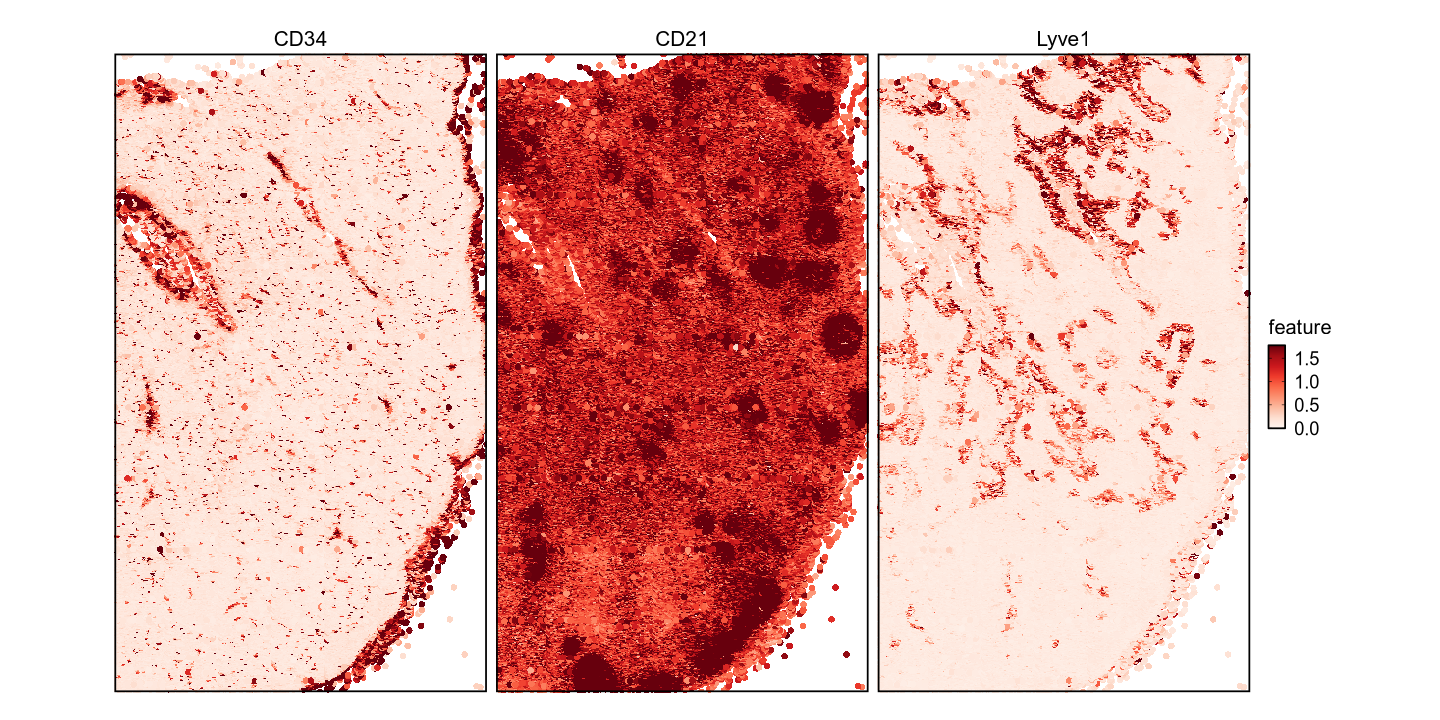

In [12]:
options(repr.plot.width = 12, repr.plot.height = 6)

SpatFeaturePlot(codex.obj, features = c("CD34", "CD21", "Lyve1"),
    upper_quantile = 0.9, palette = "Reds")


In [4]:
x <- sessionInfo()
x <- capture.output(print(x))
# hide the BLAS/LAPACK paths
x <- x[!startsWith(x, "BLAS/LAPACK:")]
cat(paste(x, collapse = "\n"))

R version 4.4.3 (2025-02-28)
Platform: x86_64-conda-linux-gnu
Running under: Red Hat Enterprise Linux 8.10 (Ootpa)

Matrix products: default

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=C              
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: America/Chicago
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] future_1.58.0      scplotter_0.4.0    Seurat_5.3.0       SeuratObject_5.1.0
[5] sp_2.2-0          

loaded via a namespace (and not attached):
  [1] cubature_2.1.4              RcppAnnoy_0.0.22           
  [3] splines_4.4.3               later_1.4.2                
  [5] pbdZMQ_0.3-14               bitops_1